In [1]:
# Importing the required Libraries #
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel("interview case study data.xlsx")

In [166]:
df.shape

(218960, 70)

In [ ]:
df=df.rename(columns={"Dec Enr":"Dec_Enr"})
df=df.rename(columns={"Jan Enr":"Jan_Enr"})
df=df.rename(columns={"feb enr":"Feb_Enr"})
df=df.rename(columns={"Net Enr":"Net_Enr"})

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218960 entries, 0 to 218959
Data columns (total 70 columns):
 #   Column                                                                  Non-Null Count   Dtype  
---  ------                                                                  --------------   -----  
 0   Year                                                                    218960 non-null  int64  
 1   State                                                                   218960 non-null  object 
 2   County                                                                  218960 non-null  object 
 3   Bid_ID                                                                  218960 non-null  object 
 4   plan_name                                                               218960 non-null  object 
 5   Organization_Name                                                       218960 non-null  object 
 6   Monthly_Consolidated_Premium_C_D                                    

In [7]:
duplicate_rows=df[df.duplicated()]
print("Number of duplicate rows :  ",duplicate_rows.shape)

Number of duplicate rows :   (0, 70)


In [12]:
df.describe().T

count         mean          std      min  \
Year                              218960.0  2018.681111     1.113882   2017.0   
Monthly_Consolidated_Premium_C_D  218960.0    43.703227    54.597898      0.0   
Annual_drug_deductible            178830.0   211.847654   170.237253      0.0   
star_rating                       195538.0     3.832176     0.509887      2.0   
In_network_MOOP_Amount            203748.0  5418.554926  1495.350041      0.0   
Dec Enr                           174912.0   289.192497  1521.109356      0.0   
Jan Enr                           218960.0   312.110833  1544.444934      0.0   
Net Enr                           174912.0    16.153289   186.877726 -10040.0   
feb enr                           218805.0   315.593844  1551.552656      0.0   

                                     25%     50%     75%       max  
Year                              2018.0  2019.0  2020.0    2020.0  
Monthly_Consolidated_Premium_C_D     0.0    27.9    65.0     375.9  
Annual_drug_deductible               0.0   200.0   400.0     435.0  
star_rating                          3.5     4.0     4.0       5.0  
In_network_MOOP_Amount            3950.0  6050.0  6700.0    6700.0  
Dec Enr                              0.0    27.0   141.0  168835.0  
Jan Enr                              0.0    39.0   166.0  169142.0  
Net Enr                             -2.0     0.0    11.0   13394.0  
feb enr                              0.0    41.0   169.0  169903.0

In [14]:
unique_counts = pd.DataFrame.from_records([(col, df[col].nunique()) for col in df.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

Column_Name  Num_Unique
35  Outpatient_Drugs_YN           1
34      Hearing_Aids_YN           2
28     Physical_Exam_YN           2
29        Dental_Pre_YN           2
30       Dental_Comp_YN           2
..                  ...         ...
4             plan_name        3690
12              Dec Enr        5188
3                Bid_ID        5743
13              Jan Enr        5924
15              feb enr        5947

[70 rows x 2 columns]

In [31]:
# Finding Outliers in each column #
def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for outlier in column:
        if outlier>upper_limit or outlier<lower_limit:
            outliers.append(outlier)
        return outliers
   
    

In [38]:
findoutliers(df['Year'])
        

[]

In [40]:
findoutliers(df['Monthly_Consolidated_Premium_C_D'])

[]

In [41]:
findoutliers(df['Annual_drug_deductible'])

[]

In [42]:
findoutliers(df['star_rating'])

[]

In [43]:
findoutliers(df['In_network_MOOP_Amount'])

[]

In [44]:
findoutliers(df['Dec Enr'])

[]

In [45]:
findoutliers(df['Jan Enr'])

[]

In [46]:
findoutliers(df['Net Enr'])

[]

In [49]:
findoutliers(df['feb enr'])

[]

In [50]:
# Finding Missing Values #

df.isnull().sum()


Year                                0
State                               0
County                              0
Bid_ID                              0
plan_name                           0
                                   ..
Enh_Telemonitoring_Services_YN      0
Enh_Remote_Access_Technologie_YN    0
Enh_Bathroom_Safety_Devices_YN      0
Enh_Counseling_Services_YN          0
Description                         0
Length: 70, dtype: int64

<AxesSubplot:>

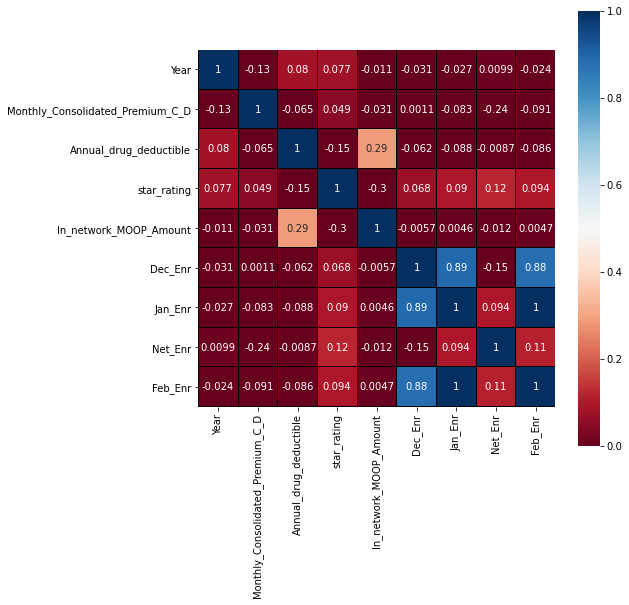

In [169]:
corr= df.corr(method='spearman')
plt.figure(figsize=(8,8))
sn.heatmap(corr,vmin=0.0,vmax=1.0,linewidths=0.01,square=True,annot=True,cmap='RdBu',linecolor='black')

<AxesSubplot:>

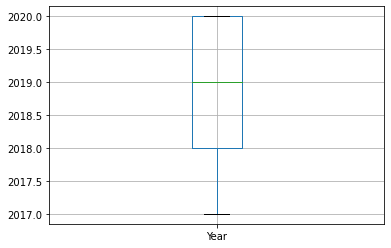

In [55]:
# Univariate Analysis #
 # Year #
df.boxplot(column=['Year'])


In [56]:
df.Year.value_counts()

2020    68008
2019    57168
2018    49736
2017    44048
Name: Year, dtype: int64

In [57]:
df.Year.value_counts(normalize=True)

2020    0.310596
2019    0.261089
2018    0.227147
2017    0.201169
Name: Year, dtype: float64

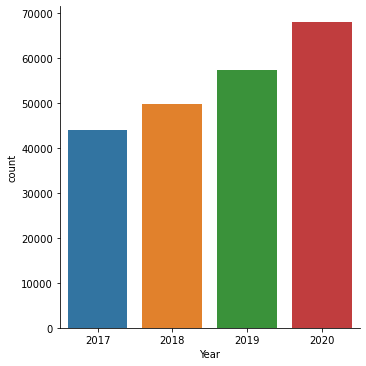

In [58]:
sn.factorplot('Year',data= df,kind='count')

In [86]:
df.Year.unique()

array([2017, 2018, 2019, 2020], dtype=int64)

In [66]:
# State #
df.State.value_counts()

Texas              15925
Puerto Rico        13190
Ohio               12686
Georgia            11930
Pennsylvania       11009
Minnesota          10529
New York            9830
Tennessee           8471
Virginia            8129
Michigan            8064
Florida             8011
Missouri            7306
Wisconsin           6893
Illinois            6468
Indiana             6153
Kentucky            6093
Arkansas            6055
North Carolina      5910
Louisiana           4421
West Virginia       3937
South Carolina      3770
Alabama             3552
Iowa                3296
Colorado            3210
Mississippi         3192
Oklahoma            2935
Kansas              2842
California          2732
South Dakota        2491
Oregon              1943
New Jersey          1766
North Dakota        1561
Washington          1559
Massachusetts       1543
Idaho               1413
Nebraska            1390
Maine               1295
New Mexico          1176
Maryland             914
Arizona              877


In [64]:
df.State.value_counts(normalize=True)

Texas              0.072730
Puerto Rico        0.060239
Ohio               0.057938
Georgia            0.054485
Pennsylvania       0.050279
Minnesota          0.048086
New York           0.044894
Tennessee          0.038687
Virginia           0.037126
Michigan           0.036829
Florida            0.036587
Missouri           0.033367
Wisconsin          0.031481
Illinois           0.029540
Indiana            0.028101
Kentucky           0.027827
Arkansas           0.027653
North Carolina     0.026991
Louisiana          0.020191
West Virginia      0.017980
South Carolina     0.017218
Alabama            0.016222
Iowa               0.015053
Colorado           0.014660
Mississippi        0.014578
Oklahoma           0.013404
Kansas             0.012980
California         0.012477
South Dakota       0.011377
Oregon             0.008874
New Jersey         0.008065
North Dakota       0.007129
Washington         0.007120
Massachusetts      0.007047
Idaho              0.006453
Nebraska           0

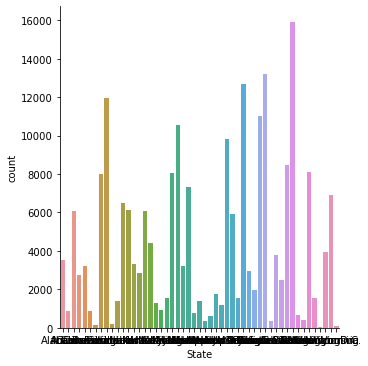

In [65]:
sn.factorplot('State',data= df,kind='count')

<AxesSubplot:xlabel='State'>

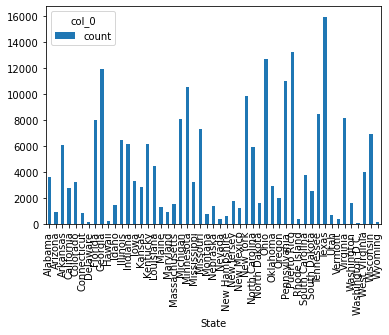

In [156]:
my_tab = pd.crosstab(index = df["State"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab.plot.bar()

In [87]:
df.State.unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington D.C.', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [67]:
# County #
df.County.value_counts()

Washington    2131
Jefferson     2002
Franklin      1554
Montgomery    1546
Jackson       1474
              ... 
Pershing         1
Benewah          1
Eureka           1
Lander           1
White Pine       1
Name: County, Length: 1883, dtype: int64

In [68]:
df.County.value_counts(normalize=True)

Washington    0.009732
Jefferson     0.009143
Franklin      0.007097
Montgomery    0.007061
Jackson       0.006732
                ...   
Pershing      0.000005
Benewah       0.000005
Eureka        0.000005
Lander        0.000005
White Pine    0.000005
Name: County, Length: 1883, dtype: float64

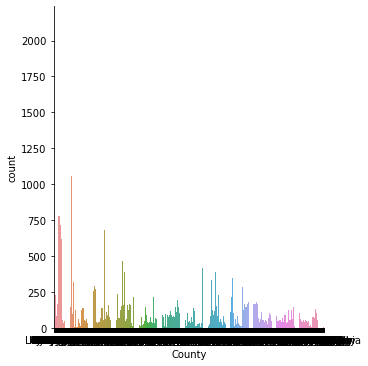

In [89]:
sn.factorplot('County',data= df,kind='count')

In [88]:
df.County.unique()

array(['Autauga', 'Baldwin', 'Barbour', ..., 'Pershing', 'White Pine',
       'Clallam'], dtype=object)

In [70]:
# Bid_ID #
df.Bid_ID.value_counts()

H1924_003_0    1268
H1924_001_0    1166
R6801_009_0    1016
R6801_008_0    1016
R6801_012_0    1016
               ... 
H3748_002_0       1
H5216_038_0       1
H5425_071_0       1
H2678_001_0       1
H4982_005_0       1
Name: Bid_ID, Length: 5743, dtype: int64

In [71]:
df.Bid_ID.value_counts(normalize=True)

H1924_003_0    0.005791
H1924_001_0    0.005325
R6801_009_0    0.004640
R6801_008_0    0.004640
R6801_012_0    0.004640
                 ...   
H3748_002_0    0.000005
H5216_038_0    0.000005
H5425_071_0    0.000005
H2678_001_0    0.000005
H4982_005_0    0.000005
Name: Bid_ID, Length: 5743, dtype: float64

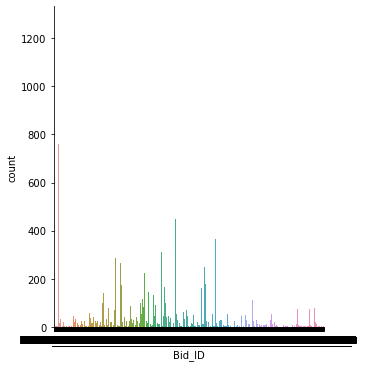

In [78]:
sn.factorplot('Bid_ID',data= df,kind='count')


<AxesSubplot:xlabel='Bid_ID'>

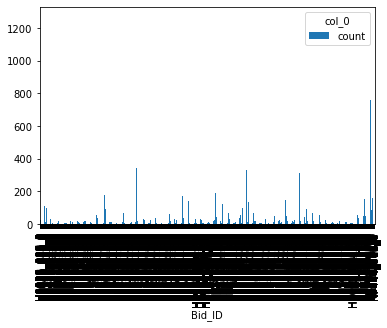

In [157]:
my_tab = pd.crosstab(index = df["Bid_ID"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab.plot.bar()

In [90]:
df.Bid_ID.unique()

array(['H0104_013_0', 'H0104_015_0', 'H0154_008_0', ..., 'H0294_016_0',
       'H5521_289_0', 'H5521_286_0'], dtype=object)

In [79]:
# Plan name #
df.plan_name.value_counts()

Lasso Healthcare (MSA)                                     2922
UnitedHealthcare Dual Complete (HMO SNP)                   1433
AARP MedicareComplete Plan 2 (HMO)                         1382
AARP MedicareComplete Plan 1 (HMO)                         1367
Care Improvement Plus Dual Advantage (Regional PPO SNP)    1298
                                                           ... 
Health Alliance Medicare SignalAdvantage HMO Rx (HMO)         1
Humana Gold Plus H2012-033 (HMO)                              1
Group Health Cooperative Centennial (HMO)                     1
Johns Hopkins Advantage MD Premier (PPO)                      1
Humana Gold Plus H2012-037 (HMO)                              1
Name: plan_name, Length: 3690, dtype: int64

In [80]:
df.plan_name.value_counts(normalize=True)

Lasso Healthcare (MSA)                                     0.013345
UnitedHealthcare Dual Complete (HMO SNP)                   0.006545
AARP MedicareComplete Plan 2 (HMO)                         0.006312
AARP MedicareComplete Plan 1 (HMO)                         0.006243
Care Improvement Plus Dual Advantage (Regional PPO SNP)    0.005928
                                                             ...   
Health Alliance Medicare SignalAdvantage HMO Rx (HMO)      0.000005
Humana Gold Plus H2012-033 (HMO)                           0.000005
Group Health Cooperative Centennial (HMO)                  0.000005
Johns Hopkins Advantage MD Premier (PPO)                   0.000005
Humana Gold Plus H2012-037 (HMO)                           0.000005
Name: plan_name, Length: 3690, dtype: float64

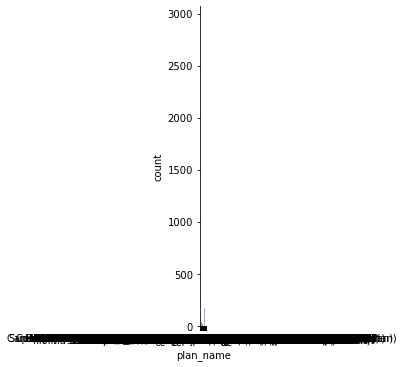

In [111]:
sn.factorplot('plan_name',data= df,kind='count')

In [83]:
plt.scatter(df[:,0], df[:,1], c=labels, cmap = 'viridis')

plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [84]:
df.plan_name.unique()

array(['Blue Advantage Complete (PPO)', 'Blue Advantage Premier (PPO)',
       'VIVA Medicare Select (HMO)', ...,
       'AARP Medicare Advantage Value (HMO)',
       'Aurora CompleteCare (HMO D-SNP)',
       'Aetna Medicare Core Value (PPO)'], dtype=object)

In [91]:
# Organization name #
df.Organization_Name.value_counts()

Humana Inc.                          54803
UnitedHealth Group, Inc.             33434
CVS Health Corporation               13787
WellCare Health Plans, Inc.          10338
Anthem Inc.                          10107
                                     ...  
El Paso Health Advantage Dual SNP        2
Humana                                   2
Allwell                                  2
Zing Health                              1
Trillium Medicare Advantage              1
Name: Organization_Name, Length: 283, dtype: int64

In [94]:
df.Organization_Name.value_counts(normalize=True)

Humana Inc.                          0.250288
UnitedHealth Group, Inc.             0.152695
CVS Health Corporation               0.062966
WellCare Health Plans, Inc.          0.047214
Anthem Inc.                          0.046159
                                       ...   
El Paso Health Advantage Dual SNP    0.000009
Humana                               0.000009
Allwell                              0.000009
Zing Health                          0.000005
Trillium Medicare Advantage          0.000005
Name: Organization_Name, Length: 283, dtype: float64

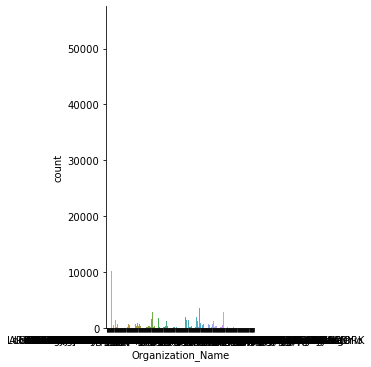

In [95]:
sn.factorplot('Organization_Name',data= df,kind='count')

In [96]:
df.Organization_Name.unique()

array(['BlueCross BlueShield of Alabama', 'Triton Health Systems, L.L.C.',
       'UnitedHealth Group, Inc.', 'Humana Inc.',
       'CVS Health Corporation', 'Steward Health Care System, LLC',
       'Centene Corporation', 'Banner Health',
       'Blue Cross Blue Shield of Arizona', 'Anthem Inc.',
       'WellCare Health Plans, Inc.', 'Mercy Care',
       'Fresenius Health Plans', 'Select Founders, LLC',
       'USAble Mutual Insurance Company', 'QualChoice Advantage',
       'ARKANSAS BLUE CROSS AND BLUE SHIELD',
       'Kaiser Foundation Health Plan, Inc.',
       'Golden State Medicare Health Plan',
       "California Physicians' Service", 'Anthem Blue Cross',
       'Molina Healthcare, Inc.,', 'Universal Care, Inc',
       'Blue Shield of California', 'InterValley Health Plan',
       'Alignment Healthcare USA, LLC', 'SCAN Health Plan',
       'AHMC Central Health LLC', 'AIDS Healthcare Foundation',
       'Local Initiative Health Authority for LA County',
       'Montage Health', 

In [97]:
# Monthly consolidated Premium_C_D #
df.Monthly_Consolidated_Premium_C_D.value_counts()

0.0      73774
29.0      2475
39.0      2407
15.0      2352
49.0      1877
         ...  
350.0        1
78.1         1
3.8          1
254.0        1
96.5         1
Name: Monthly_Consolidated_Premium_C_D, Length: 847, dtype: int64

In [98]:
df.Monthly_Consolidated_Premium_C_D.value_counts(normalize=True)

0.0      0.336929
29.0     0.011303
39.0     0.010993
15.0     0.010742
49.0     0.008572
           ...   
350.0    0.000005
78.1     0.000005
3.8      0.000005
254.0    0.000005
96.5     0.000005
Name: Monthly_Consolidated_Premium_C_D, Length: 847, dtype: float64

In [99]:
df.Monthly_Consolidated_Premium_C_D.unique()

array([ 49. , 159. ,   0. , 109. ,  31.8,  46. ,  20.1,  65. ,  97. ,
        84. ,  27. ,  16.6,  59. ,  63. ,  28. ,  47. ,  66. ,  70. ,
        43. ,  24.8,  27.2,  35.1, 166. ,  29. ,  26. ,  61. ,  95. ,
        32. ,  28.3,  26.3,  85. ,  89. , 135. , 192. ,  28.1,  52. ,
        35. ,  57. ,  30. ,  16.5,  12.1,  17.1,  34. ,  93. ,  13.6,
        26.8,  36. , 122. ,  22.5,  15. ,  87. ,  67. ,  16.9,  20. ,
        37. ,  39. ,   9. ,  68.5,  58. ,  24. ,  16. ,  28.5,  86. ,
       112. , 139. , 157. ,  69. ,  90. ,  94. ,   4.4,  80. ,  78. ,
        36.2,  36.3,  24.1,  29.9,  26.7,  10.9,  33.1,  30.8,  33.8,
        73. ,  29.7, 106. ,  51. , 239. ,  25. ,  33.5, 107. , 150. ,
        92. , 167. ,  31.7, 165. ,  21.8,  55. ,  29.2,  22. ,  74. ,
        17.8, 127. ,  50. ,  33. ,  75. ,  10. ,  19. ,  30.5,  18. ,
        82. , 220. ,  99. ,  96. ,  42. ,  41. , 175. , 296.7, 181.8,
        45. , 123.3, 102.4,  30.1,  48. , 188. ,  16.2,  27.8, 158.2,
       157.8,  38. ,

<AxesSubplot:xlabel='Monthly_Consolidated_Premium_C_D', ylabel='Density'>

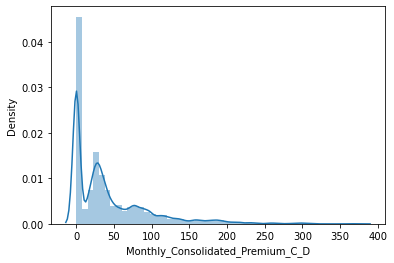

In [102]:
import seaborn as sns
sns.distplot(df["Monthly_Consolidated_Premium_C_D"],hist=True)

In [104]:
# Annual drug Deductible #
df.Annual_drug_deductible.value_counts()

0.0      53600
435.0    14962
400.0    12684
415.0    12561
405.0    10590
         ...  
323.0        3
198.0        3
141.0        2
65.0         1
119.0        1
Name: Annual_drug_deductible, Length: 96, dtype: int64

In [107]:
df.Annual_drug_deductible.value_counts(normalize=True)

0.0      0.299726
435.0    0.083666
400.0    0.070928
415.0    0.070240
405.0    0.059218
           ...   
323.0    0.000017
198.0    0.000017
141.0    0.000011
65.0     0.000006
119.0    0.000006
Name: Annual_drug_deductible, Length: 96, dtype: float64

<AxesSubplot:xlabel='Annual_drug_deductible', ylabel='Density'>

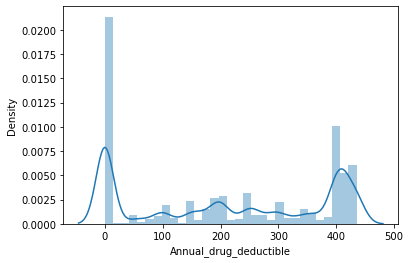

In [108]:
sns.distplot(df["Annual_drug_deductible"],hist=True)

In [112]:
# Star Rating #
df.star_rating.value_counts()

4.0    74189
3.5    59024
4.5    33785
3.0    19843
5.0     5087
2.5     3559
2.0       51
Name: star_rating, dtype: int64

In [113]:
df.star_rating.value_counts(normalize=True)

4.0    0.379410
3.5    0.301854
4.5    0.172780
3.0    0.101479
5.0    0.026015
2.5    0.018201
2.0    0.000261
Name: star_rating, dtype: float64

<AxesSubplot:xlabel='star_rating', ylabel='Density'>

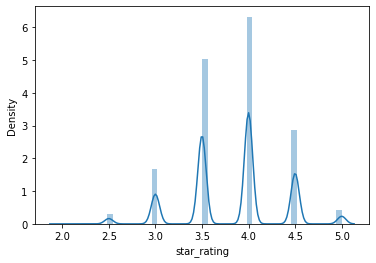

In [114]:
sns.distplot(df["star_rating"],hist=True)

In [115]:
# In Network MOOP Amount #
df.In_network_MOOP_Amount.value_counts()

6700.0    97693
3400.0    27571
5900.0     8461
4500.0     7170
4900.0     7110
          ...  
3150.0        2
2850.0        2
3399.0        2
990.0         2
50.0          1
Name: In_network_MOOP_Amount, Length: 110, dtype: int64

In [117]:
df.In_network_MOOP_Amount.value_counts(normalize=True)

6700.0    0.479480
3400.0    0.135319
5900.0    0.041527
4500.0    0.035191
4900.0    0.034896
            ...   
3150.0    0.000010
2850.0    0.000010
3399.0    0.000010
990.0     0.000010
50.0      0.000005
Name: In_network_MOOP_Amount, Length: 110, dtype: float64

<AxesSubplot:xlabel='In_network_MOOP_Amount', ylabel='Density'>

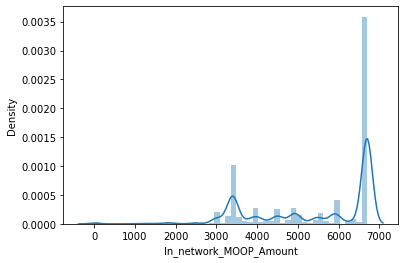

In [118]:
sns.distplot(df["In_network_MOOP_Amount"],hist=True)

In [119]:
# Special Needs Plan Type #
df.Special_Needs_Plan_Type.value_counts()

Non-SNP                           169839
Dual-Eligible                      35158
Chronic or Disabling Condition      8691
Institutional                       5272
Name: Special_Needs_Plan_Type, dtype: int64

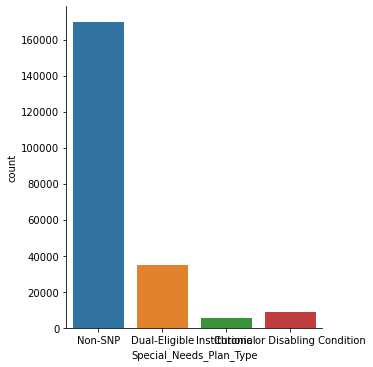

In [121]:
sn.factorplot('Special_Needs_Plan_Type',data= df,kind='count')

In [ ]:
sns.distplot(df["Special_Needs_Plan_Type"],hist=True)

In [122]:
# Plan Type #
df.plan_type.value_counts()

Local HMO         93917
Local PPO         46081
Regional PPO      25756
Local HMO *       10101
Regional PPO *     9611
Local PPO *        6819
Cost               6430
Cost *             6276
PFFS               4981
MSA *              3670
PFFS *             3653
MMP                1665
Name: plan_type, dtype: int64

In [123]:
df.plan_type.value_counts(normalize=True)

Local HMO         0.428923
Local PPO         0.210454
Regional PPO      0.117629
Local HMO *       0.046132
Regional PPO *    0.043894
Local PPO *       0.031143
Cost              0.029366
Cost *            0.028663
PFFS              0.022748
MSA *             0.016761
PFFS *            0.016683
MMP               0.007604
Name: plan_type, dtype: float64

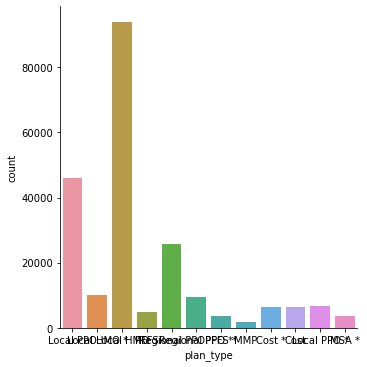

In [124]:
sn.factorplot('plan_type',data= df,kind='count')

In [133]:
# December Enrollment #
df.Dec_Enr.value_counts()

0.0        69138
12.0        1329
13.0        1323
14.0        1300
15.0        1286
           ...  
18280.0        1
12311.0        1
4086.0         1
6657.0         1
12312.0        1
Name: Dec_Enr, Length: 5188, dtype: int64

In [134]:
df.Dec_Enr.value_counts(normalize=True)

0.0        0.395273
12.0       0.007598
13.0       0.007564
14.0       0.007432
15.0       0.007352
             ...   
18280.0    0.000006
12311.0    0.000006
4086.0     0.000006
6657.0     0.000006
12312.0    0.000006
Name: Dec_Enr, Length: 5188, dtype: float64

In [135]:
df.Dec_Enr.unique()

array([   nan,   366.,    77., ..., 18188.,  3855.,  2909.])

<AxesSubplot:xlabel='Dec_Enr', ylabel='Density'>

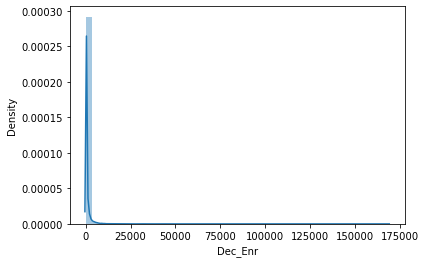

In [137]:
sns.distplot(df["Dec_Enr"],hist=True)

In [138]:
# January Enrollments #
df.Jan_Enr.value_counts()

0        63747
11        2563
12        2503
13        2388
14        2241
         ...  
8895         1
16336        1
6101         1
4054         1
4621         1
Name: Jan_Enr, Length: 5924, dtype: int64

In [139]:
df.Jan_Enr.value_counts(normalize=True)

0        0.291135
11       0.011705
12       0.011431
13       0.010906
14       0.010235
           ...   
8895     0.000005
16336    0.000005
6101     0.000005
4054     0.000005
4621     0.000005
Name: Jan_Enr, Length: 5924, dtype: float64

In [140]:
df.Jan_Enr.unique()

array([  339,    71,    11, ...,  6496, 19153,  4028], dtype=int64)

<AxesSubplot:xlabel='Jan_Enr', ylabel='Density'>

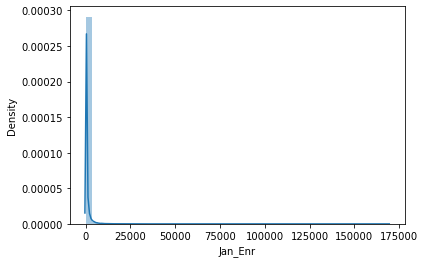

In [141]:
sns.distplot(df["Jan_Enr"],hist=True)

In [142]:
# February Enrollments #
df.Feb_Enr.value_counts()

0.0        61858
11.0        2573
12.0        2551
13.0        2446
14.0        2183
           ...  
7522.0         1
3968.0         1
2686.0         1
3371.0         1
12238.0        1
Name: Feb_Enr, Length: 5947, dtype: int64

In [143]:
df.Feb_Enr.value_counts(normalize=True)

0.0        0.282708
11.0       0.011759
12.0       0.011659
13.0       0.011179
14.0       0.009977
             ...   
7522.0     0.000005
3968.0     0.000005
2686.0     0.000005
3371.0     0.000005
12238.0    0.000005
Name: Feb_Enr, Length: 5947, dtype: float64

In [144]:
df.Feb_Enr.unique()

array([  342.,    71.,     0., ...,  7148.,  6535., 19332.])

<AxesSubplot:xlabel='Feb_Enr', ylabel='Density'>

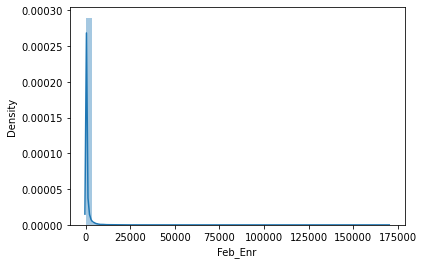

In [145]:
sns.distplot(df["Feb_Enr"],hist=True)

In [146]:
# Net Enrollments #
df.Net_Enr.value_counts()

 0.0       57221
-1.0        5675
 1.0        4980
-2.0        4754
 2.0        3894
           ...  
 855.0         1
-1694.0        1
 3761.0        1
-1185.0        1
 1174.0        1
Name: Net_Enr, Length: 2277, dtype: int64

In [151]:
df.Net_Enr.value_counts(normalize=True)

 0.0       0.327142
-1.0       0.032445
 1.0       0.028471
-2.0       0.027179
 2.0       0.022263
             ...   
 855.0     0.000006
-1694.0    0.000006
 3761.0    0.000006
-1185.0    0.000006
 1174.0    0.000006
Name: Net_Enr, Length: 2277, dtype: float64

In [152]:
df.Net_Enr.unique()

array([   nan,    13.,     2., ..., -1902.,  1633.,   965.])

<AxesSubplot:xlabel='Net_Enr', ylabel='Density'>

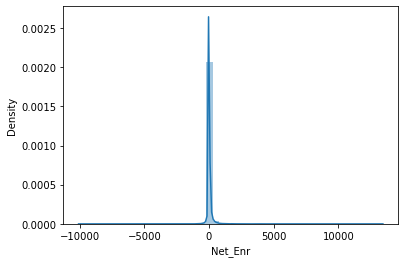

In [150]:
sns.distplot(df["Net_Enr"],hist=True)

Text(0, 0.5, 'plan_name')

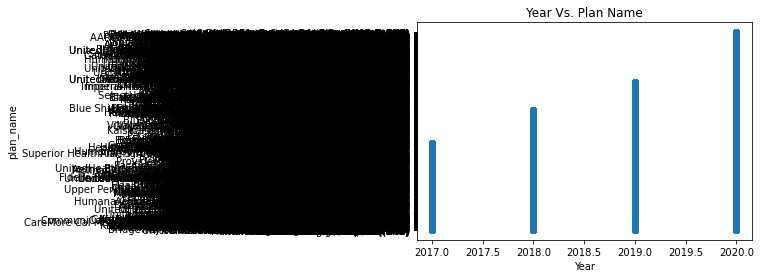

In [155]:
# Bi Variate Analysis #
# Pattern between Year and Plan name #
plt.scatter(df.Year, df.plan_name)
plt.title('Year Vs. Plan Name')
plt.xlabel('Year')
plt.ylabel('plan_name')

<AxesSubplot:title={'center':'Year'}, xlabel='plan_name'>

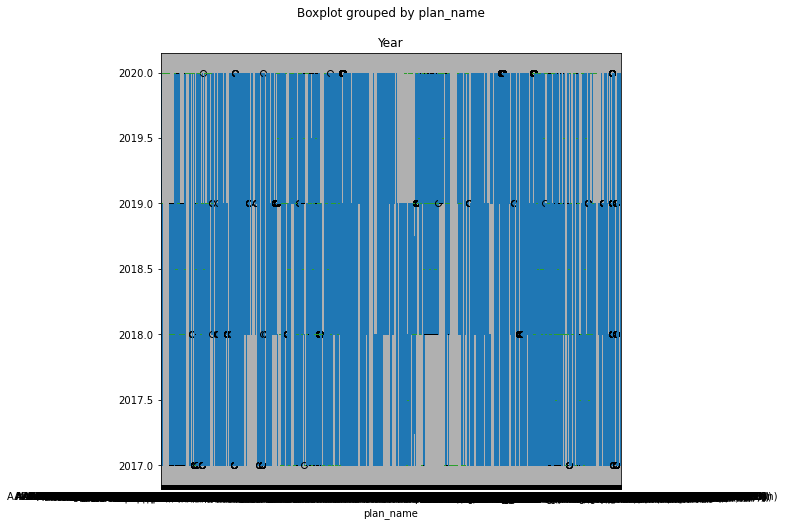

In [159]:
df.boxplot(column="Year",        # Column to plot
                 by= "plan_name",         # Column to split upon
                 figsize= (8,8))        # Figure size

In [161]:
grouped = df.groupby(['Year','plan_name'])
grouped.size()

Year  plan_name                                     
2017  'Ohana Liberty (HMO SNP)                           4
      AAA0 Vantage STANDARD (HMO-POS)                   39
      AAA1 Vantage PREMIUM (HMO-POS)                    39
      AAA4 Vantage TRADITIONAL PLUS (HMO)               61
      AAA7 Vantage Dual Special Needs Plan (HMO SNP)    61
                                                        ..
2020  iCare Family Care Partnership (HMO D-SNP)          5
      iCare Medicare Advantage Plan (HMO)                2
      iCare Medicare Plan (HMO D-SNP)                   45
      Ã¯Â¿Â½ptimo (PPO)                                 78
      Ã¯Â¿Â½ptimo Plus (PPO)                            78
Length: 7719, dtype: int64

In [162]:
table = pd.crosstab(index=df["Year"], 
                          columns=df["plan_name"])

table

plan_name  'Ohana Liberty (HMO D-SNP)  'Ohana Liberty (HMO SNP)  \
Year                                                              
2017                                0                         4   
2018                                0                         4   
2019                                0                         4   
2020                                4                         0   

plan_name  'Ohana Plus (HMO)  'Ohana Value (HMO)  \
Year                                               
2017                       0                   0   
2018                       0                   0   
2019                       0                   1   
2020                       4                   1   

plan_name  AAA0 Vantage STANDARD (HMO-POS)  AAA1 Vantage PREMIUM (HMO-POS)  \
Year                                                                         
2017                                    39                              39   
2018                                    61                              61   
2019                                    64                              64   
2020                                     0                               0   

plan_name  AAA4 Vantage TRADITIONAL PLUS (HMO)  \
Year                                             
2017                                        61   
2018                                        61   
2019                                         0   
2020                                         0   

plan_name  AAA4 Vantage TRADITIONAL PLUS (HMO-POS)  \
Year                                                 
2017                                             0   
2018                                             0   
2019                                            64   
2020                                             0   

plan_name  AAA7 Vantage Dual Special Needs Plan (HMO SNP)  \
Year                                                        
2017                                                   61   
2018                                                   61   
2019                                                    0   
2020                                                    0   

plan_name  AAA7 Vantage Dual Special Needs Plan (HMO-POS SNP)  ...  \
Year                                                           ...   
2017                                                       0   ...   
2018                                                       0   ...   
2019                                                      64   ...   
2020                                                       0   ...   

plan_name  Wellcare Access (HMO SNP)  Wellcare Value (HMO)  \
Year                                                         
2017                              16                     3   
2018                              32                     7   
2019                               0                     0   
2020                               0                     0   

plan_name  Zing Choice IL (HMO)  iCare Family Care Partnership (HMO D-SNP)  \
Year                                                                         
2017                          0                                          0   
2018                          0                                          0   
2019                          0                                          0   
2020                          1                                          5   

plan_name  iCare Family Care Partnership (HMO SNP)  \
Year                                                 
2017                                             4   
2018                                             4   
2019                                             5   
2020                                             0   

plan_name  iCare Medicare Advantage Plan (HMO)  \
Year                                             
2017                                         0   
2018                                         0   
2019                              

<AxesSubplot:xlabel='Year'>

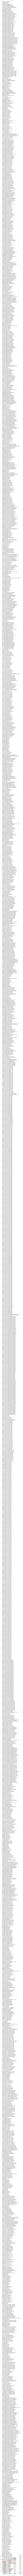

In [164]:
table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)